
### <center>Procesamiento Digital de Señales de Audio</center>
#### <center>Instituto de Ingeniería Eléctrica - UdelaR</center>
# Hoja de Ejercicios 4 - Curso 2022
### Análisis homomórfico
### Análisis por predicción lineal


## Pautas para el práctico
 - La realización del presente trabajo es individual.
 - Se espera la entrega de un PDF escrito en $\LaTeX$ o similar. El mismo tendrá:
     - Máximo de 14 páginas
     - Máximo de 2500 palabras
 - También se espera la entrega del código escrito, en scripts Python o en este mismo Jupyter Notebook.
 - La corrección del práctico se hará sobre lo entregado en el PDF, pero podremos apoyarnos en el razonamiento y comprensión demostrado en el código escrito. Recomendamos escribir el código de forma prolija para facilitar la comprensión presente y futura tanto de nosotros como de ustedes mismxs.


**Nombre de el/la estudiante:** Julieta Umpierrez

### Como correr este notebook

Es posible descargarlo y correrlo localmente en su computadora

Tambien pueden correrlo en Google Colab usando el siguiente link.

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/practicos/AudioDSP_Practico_4.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Correr en Google Colab</a>
  </td>
</table>

In [ ]:
# Al correr esta celda, se podrá acceder a archivos
# y carpetas en su cuenta de google drive.
# Puede ver la estructura de carpetas apretando en
# el icono de carpeta de la barra lateral izquierda.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, signal
from scipy.io.wavfile import read
from IPython.display import Audio

# Ejercicio 1

En este ejercicio se estudia el cepstrum de señales de audio. Según el modelo del mecanismo de producción de la voz, la señal de voz se puede expresar como $s[n]=p[n]*h[n]$, donde $p[n]$ es la señal de excitación y $h[n]$ es la respuesta al impulso del tracto vocal. Mediante el cepstrum complejo se pretende deconvolucionar la señal de voz en la excitación y la respuesta al impulso.


## Parte 1


1. En el caso de sonidos sonoros, la excitación $p[n]$ es un tren de pulsos periódico,

    $$p[n]=\beta^n\sum_{k=0}^{\infty}\delta[n-kP]$$

    Calcular analíticamente el cepstrum complejo $\hat{p}[n]$ de $p[n]$. Graficar empleando los valores $\beta = 0.99$ y $P=80$.

1. Calcular analíticamente el cepstrum complejo $\hat{h}[n]$ de la secuencia $h[n]$ cuya transformada $\mathcal{Z}$ es
  $$ H(z) = \frac{(1-bz)(1-b^*z)}{(1-cz^{-1})(1-c^*z^{-1})},\;\;\;\textrm{con }|b|,|c|<1 $$

    Graficar empleando los valores $b=0.97e^{j0.88\pi}$ y $c=0.97e^{j0.12\pi}$.

1. Considere ahora la señal $s[n]=h[n]*p[n]$. Calcular analíticamente el cepstrum $\hat{s}[n]$ de $s[n]$.

1. Calcular el cepstrum complejo de las señales $p[n]$ y $h[n]$ utilizando la Transformada Discreta Fourier. Comparar con el resultado analítico y comentar los resultados.

1. Se desea recuperar la respuesta al impulso $h[n]$ a partir de la señal $s[n]$. Para hacerlo, liftrar el cepstrum complejo $\hat{s}[n]$ apropiadamente eliminando los componentes de altas quefrencys y aplicar el cepstrum inverso. Comparar gráficamente la respuesta al impulso recuperada con la respuesta al impulso verdadera.


In [ ]:
#Codigo adaptado de notebook de clase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


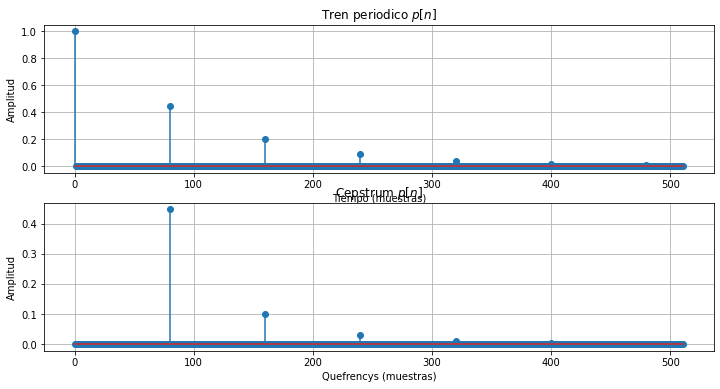

In [ ]:
#Grafica parte 1
# number of samples (note this is not the period)
N = 512
# period in samples (the N value of the equation)
T = 80
# atenuation factor
beta = 0.99
p = np.zeros(N)
k = np.arange(1, np.floor((N-1)/T)+1)
kP = k * T
kP = kP.astype(int)
p[kP] = beta**kP
p[0] = 1
# plot periodic train
pc = np.zeros(N)
k = np.arange(1, np.floor((N-1)/T)+1)
kPc = k * T
kPc = kPc.astype(int)
pc[kPc] = T*beta**kPc/kPc
pc[0] = 0

plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
ax1.stem(p)
ax1.set_title('Tren periodico $p[n]$')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Tiempo (muestras)')
ax1.grid()
ax1 = plt.subplot(2, 1, 2)
ax1.stem(pc)
ax1.set_title('Cepstrum $p[n]$')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Quefrencys (muestras)')
ax1.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


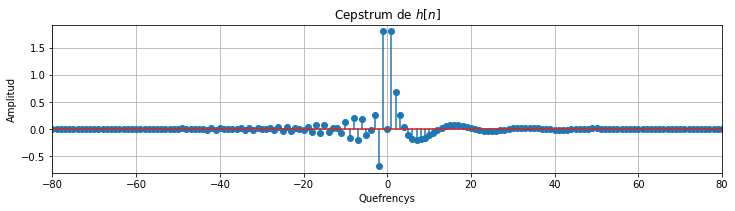

In [ ]:
#Parte 2
# magnitude and phase of the zero
mz = 0.97
phiz = 0.88 * np.pi
# magnitude and phase of the pole
mp = 0.97
phip = 0.12 * np.pi

# coefficients of the zero and pole
b = mz * np.exp(1j * phiz)
c = mp * np.exp(1j * phip)

hpos = np.zeros(N)
nspos = np.arange(N)
for n in nspos:
  if n>0:
   hpos[n] = (2/n)*(mp**n)*np.cos(n*phip)
hneg = np.zeros(N)
nsneg = -np.flip(np.arange(N))
nsneg = nsneg[:nsneg.size-1]
for n in nsneg:
    hneg[n] = (2/n)*(mz**(-n))*np.cos(n*phiz)
cero = np.zeros(1)
final = np.concatenate((hneg[1:],cero,hpos[1:]))
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
ax1.stem(np.arange(-511,512),final)
ax1.set_title('Cepstrum de $h[n]$')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Quefrencys')
ax1.set_xlim(-80,80)
ax1.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


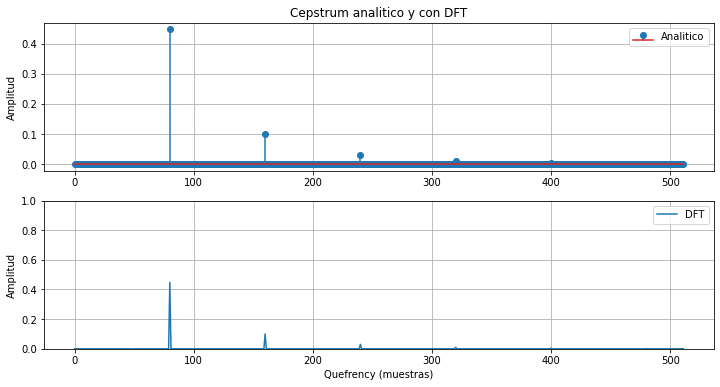

In [ ]:
#Parte 4
# DFT of the periodic impulse train
P = np.fft.fft(p)
# frequency values
w = np.fft.fftfreq(N)
# magnitude
magP = abs(P)
# phase
phaseP = np.angle(P)
# phase unwraped
phaseP_unw1 = np.unwrap(phaseP)

# === elimination of the linear phase component

# index of the phase value at pi
ind_pi = int(np.floor((N+1)/2))

# compute the linear phase factor
r = round(phaseP_unw1[ind_pi]/np.pi)

# compute the linear phase component
ph_lin_component = r * np.pi * np.arange(N) / ind_pi

# substract the linear phase component
phaseP_unw2 = phaseP_unw1 - ph_lin_component;

# check that phase at 0 and pi frequency is 0
assert phaseP_unw2[0] == 0, "Phase value at zero is not 0"
assert phaseP_unw2[ind_pi] == 0, "Phase value at pi is not 0"
 # compute the complex logarithm (using magH and phaseH)
logP = np.log(magP) + 1j * phaseP_unw2

# IDFT
hat_p = np.real(np.fft.ifft(logP));
 # amplitude envelope for periodic impulse train and its complex cepstrum
n = np.linspace(1, N)
b1 = beta**n
b2 = T * (beta**n) / n

plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
ax1.stem(pc, label = 'Analitico')
#ax1.plot(n, b1, '--r', label = )
ax1.set_title('Cepstrum analitico y con DFT')
ax1.set_ylabel('Amplitud')
#ax1.set_xlabel('Tiempo (muestras)')
ax1.grid()
ax1.legend()
ax2 = plt.subplot(2, 1, 2)
ax2.plot(hat_p, label = "DFT")
#ax2.plot(n, b2, '--r')
ax2.set_ylabel('Amplitud')
ax2.set_xlabel('Quefrency (muestras)')
ax2.set_ylim([0, 1])
ax2.grid()
ax2.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


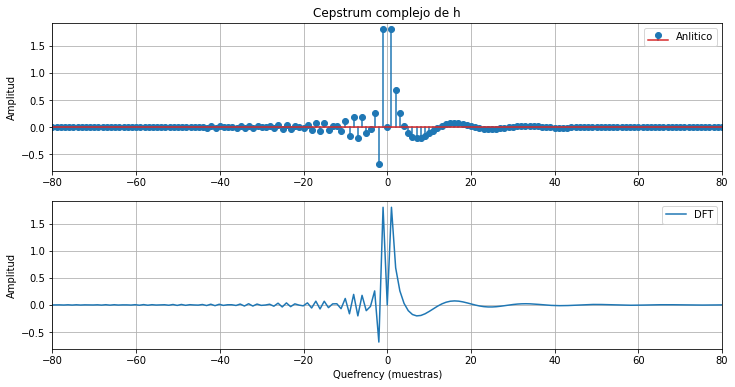

In [ ]:
# coefficients of the zero and pole
b = mz * np.exp(1j * phiz)
c = mp * np.exp(1j * phip)

# numerator and denominator coefficients
B = [mz**2, -2*mz*np.cos(phiz), 1]
A = [1, -2*mp*np.cos(phip), mp**2]
# number of DFT values
N = 512
# compute the transfer function
w, H = signal.freqz(B, A, worN=N, whole=True)

# magnitude
magH = abs(H)
# phase
phaseH = np.angle(H)
# phase unwraped
phaseH_unw1 = np.unwrap(phaseH)

# === elimination of the linear phase component

# index of the phase value at pi
ind_pi = int(np.floor((N+1)/2))

# compute the linear phase factor
r = round(phaseH_unw1[ind_pi]/np.pi)

# compute the linear phase component
ph_lin_component = r * np.pi * np.arange(N) / ind_pi

# substract the linear phase component
phaseH_unw2 = phaseH_unw1 - ph_lin_component;

# check that phase at 0 and pi frequency is 0
assert phaseH_unw2[0] == 0, "Phase value at zero is not 0"
assert phaseH_unw2[ind_pi] == 0, "Phase value at pi is not 0"
# compute the complex logarithm (using magH and phaseH)
logH = np.log(magH) + 1j*phaseH_unw2

# IDFT
hat_h = np.fft.ifft(logH).real
plt.figure(figsize=(12,6))
q = np.linspace(-N/2-1, N/2, N)
ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Cepstrum complejo de h')
ax1.stem(np.arange(-511,512),final, label = 'Anlitico')
ax1.set_xlim(-80,80)
ax1.set_ylabel('Amplitud')
ax1.grid()
ax1.legend()
ax2 = plt.subplot(2, 1, 2)
ax2.plot(q, np.fft.fftshift(hat_h), label = 'DFT')
ax2.set_ylabel('Amplitud')
ax2.set_xlabel('Quefrency (muestras)')
ax2.set_xlim([-80, 80])
ax2.grid()
ax2.legend()

(-300.0, 300.0)

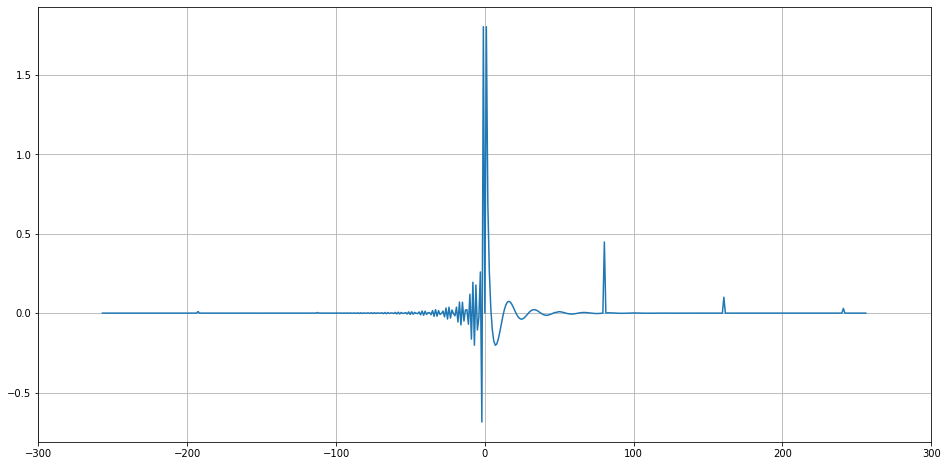

In [ ]:
#Parte 5
shat = np.fft.fftshift(hat_h) + np.fft.fftshift(hat_p)
plt.figure(figsize = (16,8))
plt.plot(q,shat)
plt.grid()
ax2.set_ylabel('Amplitud')
ax2.set_xlabel('Quefrency (muestras)')
plt.xlim(-300,300)

(-200.0, 200.0)

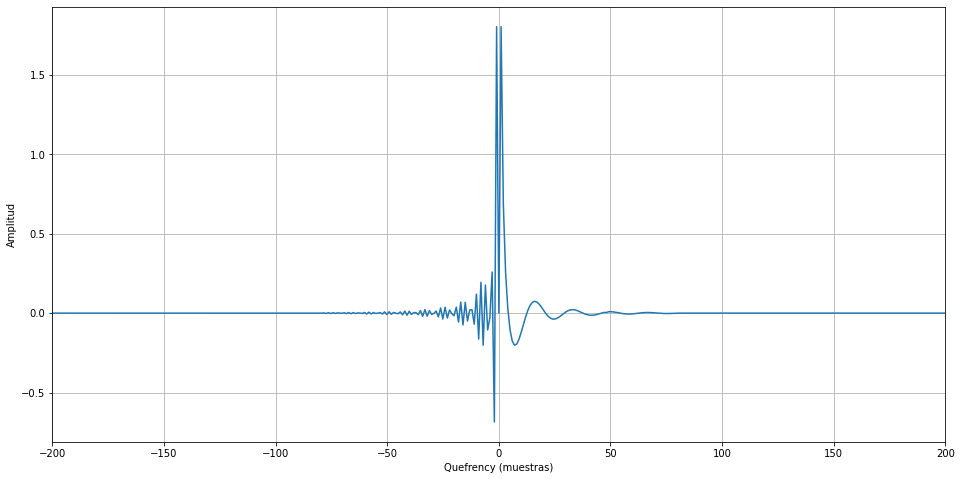

In [ ]:
shat_liftrado = np.zeros(N)
shat_liftrado[-335:335] = shat[-335:335]
plt.figure(figsize = (16,8))
plt.plot(q,shat_liftrado)
plt.ylabel('Amplitud')
plt.xlabel('Quefrency (muestras)')
plt.grid()
plt.xlim(-200,200)

In [ ]:
print(q[335
        ])

79.31115459882585


In [ ]:
B = [mz**2, -2*mz*np.cos(phiz), 1]
A = [1, -2*mp*np.cos(phip), mp**2]
w, H = signal.freqz(B, A, worN=N, whole=True)
h_original = np.fft.ifft(H)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


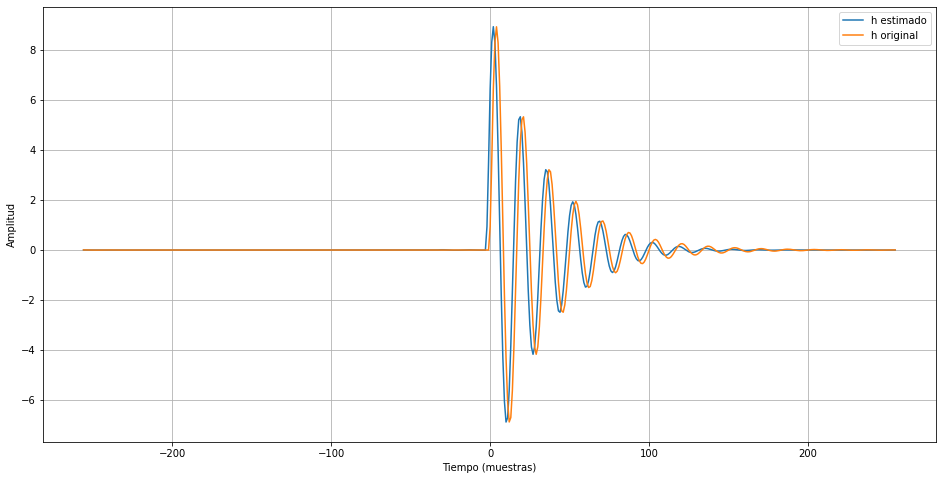

In [ ]:
shat_liftrado_transf = np.fft.fft(np.fft.ifftshift(shat_liftrado))
shat_liftrado_exp = np.exp(shat_liftrado_transf.real + 1j *shat_liftrado_transf.imag)
h = np.fft.ifft(shat_liftrado_exp).real
plt.figure(figsize = (16,8))
plt.plot(np.arange(-int(h.size/2),int(h.size/2)),np.fft.fftshift(h), label = 'h estimado')
plt.plot(np.arange(-int(h.size/2),int(h.size/2)),np.fft.fftshift(h_original), label = 'h original')
plt.grid()
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.legend()

## Parte 2
Algunas aplicaciones del cepstrum real en señales de voz son la estimación de la frecuencia fundamental y la detección de formantes. Para eso, se procesa la señal en fragmentos de tiempo corto y se calcula el cepstrum real de cada fragmento. La presencia de un pico en la región de medianas o altas quefrencys es un indicador de sonoridad y la quefrency del pico indica el período.

Se sugiere seguir los siguientes pasos para estimar la evolución de la frecuencia fundamental de la señal de voz del archivo *LP-mem-6-a.wav*

  1. Calcular el cepstrum de tiempo corto de la señal. Graficar el resultado en el plano tiempo-quefrency eliminando los componentes de bajas quefrencys para la correcta visualización del cepstrum del tren de pulsos periódico en las regiones sonoras.
  1. A partir de la presencia y posición del pico construir un algoritmo para la detección de sonoridad y frecuencia fundamental. Establecer la frecuencia fundamental en 0 Hz en las regiones en donde el sonido es sordo. Comparar el resultado con el *ground-truth*.
  



In [ ]:
#Ground truth
gt = np.genfromtxt(fname='/content/drive/MyDrive/Colab Notebooks/AudioDSP_Files/LP-mem-6-a.txt')

In [ ]:
sr, audio = io.wavfile.read('/content/drive/MyDrive/Colab Notebooks/AudioDSP_Files/LP-mem-6-a.wav')
Audio(audio, rate=sr)

In [ ]:
#Funciones de notebooks de clase para calcular analisis y sintesis de STFT
def analysis_STFT(x, L=2048, R=256, win='hann'):
    """ compute the analysis phase of the phase vocoder, i.e. the STFT of the input audio signal

    Parameters
    ----------
    x : numpy array
        input audio signal (mono) as a numpy 1D array.
    L : int
        window length in samples.
    R : int
        hop size in samples.
    win : string
          window type as defined in scipy.signal.windows.

    Returns
    -------
    X_stft : numpy array
             STFT of x as a numpy 2D array.
    omega_stft : numpy array
                 frequency values in radians.
    samps_stft : numpy array
                 time sample at the begining of each frame.

    """

    # length of the input signal
    M = x.size;

    # number of points to compute the DFT (FFT)
    N = L

    # analysis window
    window = signal.windows.get_window(win, L)

    # total number of analysis frames
    num_frames = int(np.floor((M - L) / R))

    # initialize stft
    X_stft = np.zeros((N, num_frames), dtype = complex)

    # process each frame
    for ind in range(num_frames):

        # initial and ending points of the frame
        n_ini = int(ind * R)
        n_end = n_ini + L

        # signal frame
        xr = x[n_ini:n_end]*window

        # save DFT of the signal frame
        X_stft[:, ind] = np.fft.fft(xr,N)

    # frequency values in radians
    omega_stft = np.arange(N)*2*np.pi/N

    # time sample at the center of each frame
    samps_stft = np.arange(num_frames)*R + L/2

    return X_stft, omega_stft, samps_stft, num_frames

In [ ]:
#Funcion que calcula el cepstrum complejo de tiempo corto,
def cepstrum_tiempo_corto(audio, sr, L=256,R=64):
  X_stft, omega, samps, num_frames = analysis_STFT(audio, L = L, R = R)
  N = L
  Logs_stft = np.zeros((N, num_frames))
  cepstrum_st = np.zeros((N, num_frames))
  dt = 1/sr
  f0 = np.zeros(num_frames)
  fc = 20
  umbral = 0.05
  for n in range(num_frames):
    H = X_stft[:,n]
    # magnitude
    magH = abs(H)
    logH = np.log(magH)
    Logs_stft[:,n] = logH
    original = np.fft.fftshift(np.fft.ifft(logH)).real
    original[int(N/2-fc):int(N/2+fc)] = 0
    cepstrum_st[:,n] = original
    q = np.linspace(-N/2-1, N/2, N)
    indices_umbralizados = (cepstrum_st[:,n]>umbral)
    maximo = np.argmax(np.abs(cepstrum_st[:,n]))
    q_max = abs(q[maximo])
    if cepstrum_st[maximo,n]>0.18:
      f0[n] =sr/abs(q_max)
    if f0[n]>500:
     f0[n] = 0
  return cepstrum_st, q,samps,f0

In [ ]:
cepstrum, q, time,f0= cepstrum_tiempo_corto(audio,sr)

Text(0, 0.5, 'f0')

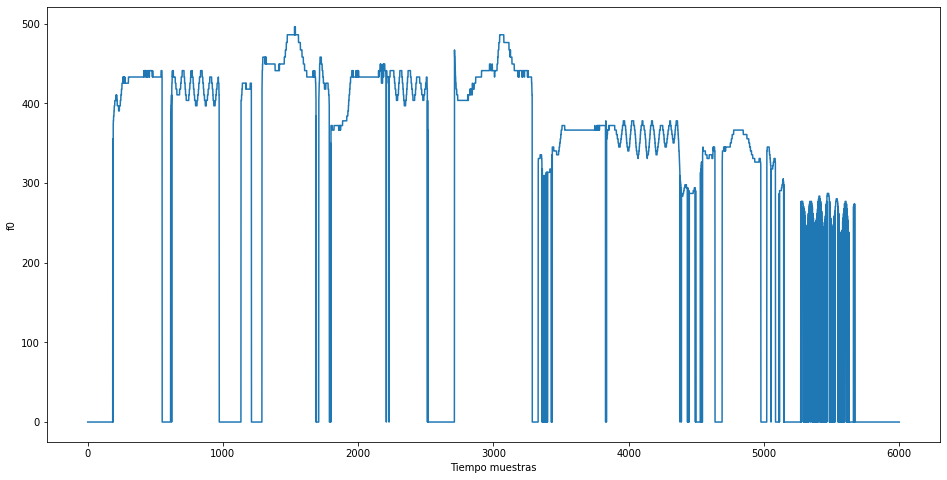

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(f0)
plt.xlabel('Tiempo muestras')
plt.ylabel('f0')

Text(0, 0.5, 'f0')

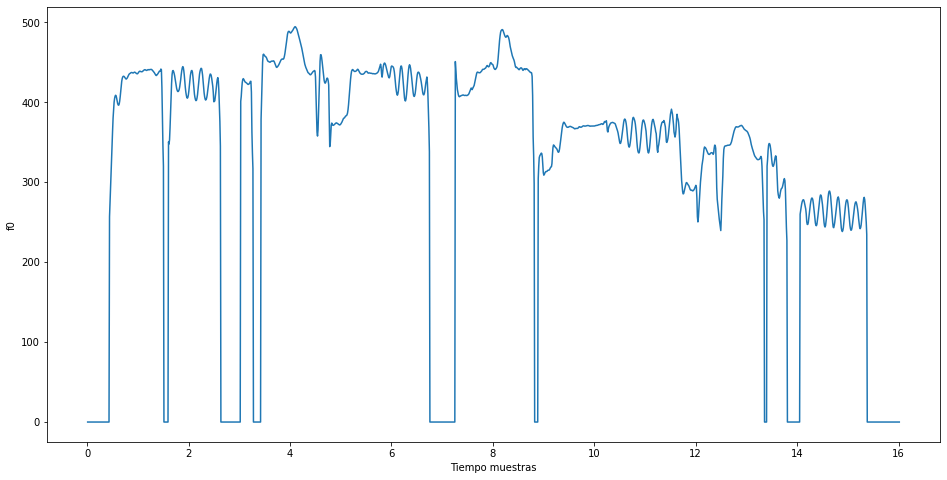

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(gt[:,0],gt[:,1])
plt.xlabel('Tiempo muestras')
plt.ylabel('f0')

Text(0, 0.5, 'f0')

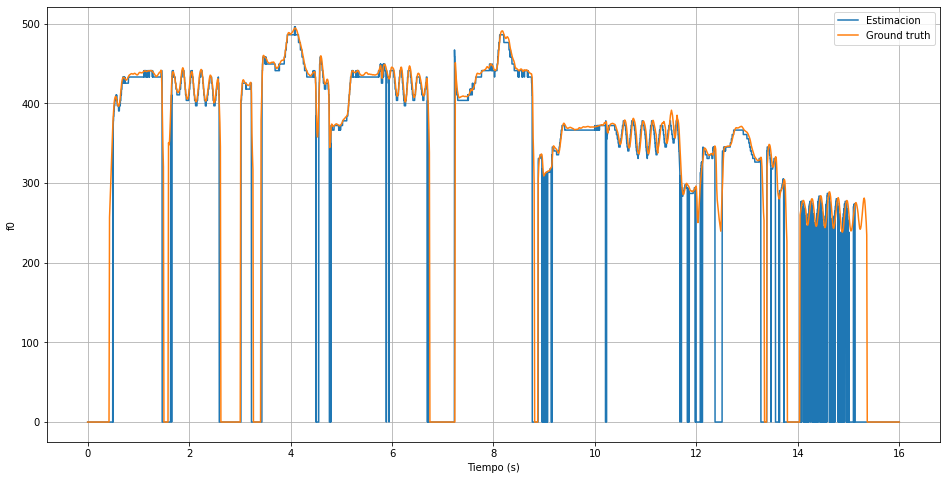

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(np.linspace(0,int(len(audio)/sr),len(f0)),f0, label = 'Estimacion')
plt.plot(np.linspace(0,int(len(audio)/sr), len(gt[:,1])),gt[:,1], label = 'Ground truth')
plt.legend()
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('f0')

Text(0, 0.5, 'Quefrencys')

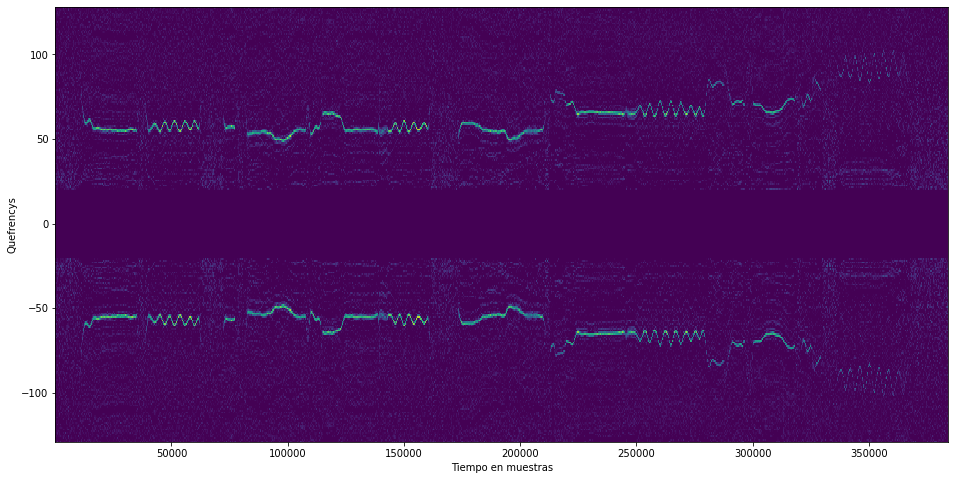

In [ ]:
plt.figure(figsize = (16,8))
plt.pcolormesh(time, q, cepstrum, vmin=0, shading='auto')
plt.xlabel("Tiempo en muestras")
plt.ylabel("Quefrencys")

# Ejercicio 2

## Parte 1

En el modelo de predicción lineal se asume que la muestra actual de la señal de voz $s[n]$ es predecible a partir de una combinación lineal de $p$ muestras previas,

$$\tilde{s}[n] = \sum_{k=1}^{p}\alpha_k s[n-k]$$

El problema consiste en encontrar los coeficientes $\alpha_k$ del predictor que mejor aproximan a la señal $s[n]$. Para eso se define el error de predicción como

$$e_n[m] = s_n[m] - \tilde{s}_n[m]$$

donde $s_n[m]$ es un fragmento de tiempo corto de la señal de voz elegido en torno a la muestra $n$.

Se define el error cuadrático medio de predicción como

$$E_n = \sum_m e_n^2[m]$$

para algún intervalo de muestras $m$ que no es necesario especificar por el momento.
En el modelo de predicción lineal, el conjunto de coeficientes $\lbrace\hat{\alpha}_k\rbrace$ óptimo es el que minimiza el error cuadrático medio de predicción. Se pide:


1. Demostrar que los coeficientes que minimizan el error cuadrático medio obedecen el siguiente sistema lineal de ecuaciones (*ecuaciones normales*),

    $$\sum_{k=1}^{p}\hat{\alpha}_k\sum_m s_n[m-i]s_n[m-k]=\sum_m s_n[m-i]s_n[m],\,\,\,1\leq i \leq p$$

1. Demostrar que el error cuadrático medio mínimo de predicción es

    $$E_n = \sum_m s_n^2[m]-\sum_{k=1}^p\hat{\alpha}_k\sum_m s_n[m]s_n[m-k]$$



## Parte 2

En este problema se aplica la técnica de LPC para la clasificación de vocales, usando una base de datos de vocales aisladas pronunciadas por dos hablantes.

El procedimiento consiste en calcular el modelo todo polos de la señal de voz, y a partir de los polos obtener la frecuencia de las dos primeras formantes $\left(F_1,\,F_2\right)$.


A modo de referencia, en el cuadro de abajo se indica la frecuencia promedio de las dos primeras formantes de las vocales del idioma español (Estos datos son aproximaciones de los datos provistos en http://liceu.uab.es/~joaquim/phonetics/fon_anal_acus/caract_acust.html).


La señal analizada puede clasificarse a partir la vocal de referencia mas cercana en el plano $\left(F_1,\,F_2\right)$.

| Fonema | $F_1(Hz)$ | $F_2(Hz)$ |
|:------:|:---------:|:---------:|
|   /a/  |    800    |    1170   |
|   /e/  |    480    |    2300   |
|   /i/  |    240    |    2800   |
|   /o/  |    510    |    960    |
|   /u/  |    250    |    630    |

<center>**Primeras dos formantes de las vocales en el idioma español.**</center>


1. Implementar un algoritmo para procesar todas las señales de la base de datos, calculando para cada una la frecuencia de las dos primeras formantes. Mostrar los resultados como un mapa de formantes en el plano $\left(F_1,\,F_2\right)$.
1. Clasificar las señales a partir de las vocales de referencia. Reportar la tasa de acierto obtenida para cada vocal y para cada hablante.
1. Analizar los resultados y proponer alguna estrategia para mejorarlos.
    

Las señales de la base de datos están muestreadas a 8000 Hz. Hay un directorio por hablante y el nombre de los archivo de audio es **[vocal]-[número].wav**, con **número** de 1 a 10.
Los archivos contienen un único fonema, de duración variable (sin silencio al comienzo o al final), pero todos superan las 550 muestras.


Tener en cuenta los siguientes aspectos.

- Se sugiere tomar una ventana centrada en la muestra central de cada señal.
- Elegir adecuadamente el tamaño de la ventana $N$ y el orden $p$ del modelo.
- Calcular los polos y representarlos en un diagrama de polos y ceros.
- Eliminar los polos reales y los polos con $\omega\geq\pi$ (Son redundantes por ser complejos conjugados de los polos con $\omega<\pi$). Eliminar los polos de ancho de banda mayor a cierto umbral. Elegir adecuadamente el umbral.
- Establecer la frecuencia de las dos primeras formantes como la frecuencia de los dos polos de menor frecuencia.


In [ ]:
from scipy.linalg import toeplitz
from scipy.linalg import solve

In [ ]:
def load(vocal_in,hablante):
  vocal = []
  for i in range(1,11):
     sr, audio = io.wavfile.read('/content/drive/MyDrive/Colab Notebooks/AudioDSP_Files/vocales/' + hablante + '/' + vocal_in + '-' + str(i) + '.wav' )
     vocal.append(audio)
  return vocal

In [ ]:
a = load('i','martin')

In [ ]:
Audio(a[5], rate=8000)

In [ ]:
def enventanado(x,fs = 8000,size_win=240):
  cantidad_muestras = len(x)
  s = x[int(cantidad_muestras//2)-int(np.floor(size_win/2)):int(cantidad_muestras//2)+int(np.floor(size_win/2))]
  window = signal.windows.get_window('hann', size_win)
  s_win = s*window
  return s_win

In [ ]:
def lpc_analysis(s, p=20):
    """ compute the LPC analysis using the autocorrelation method

    Parameters
    ----------
    x : numpy array
        windowed signal frame as a numpy 1D array.
    p : int
        model order.

    Returns
    -------
    ak : numpy array
         model coefficients.
    e : float
        minimum mean squared error.
    e_norm : float
             normalized minimum mean squared error.
    """
    # frame length
    N = s.shape[0]

    # compute autocorrelation values
    r = np.zeros((p+1, 1))
    for k in range(p+1):
        r[k] = np.dot(s[:N-k].T, s[k:])

    # solve to compute model coefficients
    ak = solve(toeplitz(r[:p]), r[1:p+1]).squeeze()
    return ak

In [ ]:
fs = 8000
# model order
p = int(fs/1000) + 3
s_win = enventanado(a[5])
# apply lpc analysis to signal frame
ak = lpc_analysis(s_win, p)
# filter obtained from the lpc analysis
S = [1]
U = np.concatenate([[1], -ak])

In [ ]:
Audio(s_win, rate = 8000)

In [ ]:
from  matplotlib import patches
from matplotlib.pyplot import axvline, axhline

In [ ]:
def polos_ceros(A,B,sr=fs):
  z, p, k = signal.tf2zpk(B, A)
  # plot zero pole diagram
  #plt.figure(figsize=(12, 12))
  #ax1 = plt.subplot(2, 1, 1)
  #ax = plt.subplot(2, 2, 1)
  # unit circle and zero axes
  #unit_circle = patches.Circle((0,0), radius=1, fill=False,
                             # color='black', ls='solid', alpha=0.6)
  #ax.add_patch(unit_circle)
  #axvline(0, color='0.6')
  #axhline(0, color='0.6')

  # plot the zeros and set marker properties
  #t1 = plt.plot(z.real, z.imag, 'go', ms=10)
  #plt.setp(t1, markersize=10.0, markeredgewidth=1.0,
   #       markeredgecolor='k', markerfacecolor='g')
  # plot the poles and set marker properties
  #t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
  #plt.setp(t2, markersize=12.0, markeredgewidth=3.0,
   #       markeredgecolor='r', markerfacecolor='r')

  #plt.title("Pole-Zero Plot")
  #plt.xlabel("Real")
  #plt.ylabel("Imaginary");
  polos_1 = np.zeros(p.size, dtype=complex)
  cantidad = 0
  for i in range(p.size):
    if (np.angle(p[i])<np.pi) and (np.angle(p[i])>0) :
      polos_1[cantidad] = p[i]
      cantidad = cantidad+1
  polos_2 = polos_1[:cantidad]
  polos_3 = np.zeros(polos_2.size, dtype=complex)
  cantidad = 0
  for i in range(polos_2.size):
    if fs/np.pi*np.log(1/abs(polos_2[i]))<200:
      polos_3[cantidad] = polos_2[i]
      cantidad = cantidad+1
  polos_4 = polos_3[:cantidad]
   # plot the poles and set marker properties
  #t2 = plt.plot(polos_4.real, polos_4.imag, 'bx', ms=10)
  #plt.setp(t2, markersize=12.0, markeredgewidth=3.0,
   ##       markeredgecolor='b', markerfacecolor='b')
  formantes = np.angle(polos_4)*sr/(2*np.pi)
  #print(formantes)
  F1_F2 = np.sort(formantes)[0:2]
  return F1_F2

In [ ]:
F1_F2 = polos_ceros(U,S)
print(F1_F2)

[230.85778065 542.23976772]


In [ ]:
def clasificador(vocal_in, hablante, fs = fs, p = int(fs/1000) + 3):
  audios = load(vocal_in,hablante)
  formantes_obtenidas = np.zeros((len(audios),2))
  for i in range(len(audios)):
    s_win = enventanado(audios[i])
    ak = lpc_analysis(s_win, p)
    S = [1]
    U = np.concatenate([[1], -ak])
    formantes_obtenidas[i,:] = polos_ceros(U,S)
  return formantes_obtenidas

Text(0, 0.5, 'F2')

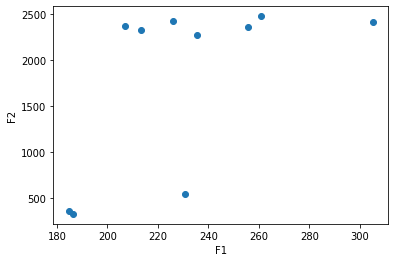

In [ ]:
formantes_obtenidas = clasificador('i','martin')
plt.scatter(formantes_obtenidas[:,0],formantes_obtenidas[:,1])
plt.xlabel('F1')
plt.ylabel('F2')

In [ ]:
def dist(p,q):
  x1 = p[0]
  y1 = p[1]
  x2 = q[0]
  y2 = q[1]
  distance = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
  return distance

In [ ]:
def clasificador_final(vocal_in, hablante, fs = fs, p = int(fs/1000) + 3):
  formantes_obtenidas = clasificador(vocal_in,hablante)

  centros = np.zeros((5,2))
  centros[0,0] = 800      #F1 a
  centros[0,1] = 1170 	  #F2 a
  centros[1,0] = 480      #F1 e
  centros[1,1] = 2300     #F2 e
  centros[2,0] = 240      #F1 i
  centros[2,1] = 2800     #F2 i
  centros[3,0] = 510      #F1 o
  centros[3,1] = 960      #F2 o
  centros[4,0] = 250      #F1 u
  centros[4,1] = 630      #F2 u

  etiqueta_original = vocal_in
  etiquetas_posibles = np.array(['a','e', 'i', 'o','u'])
  etiquetas_estimadas = []

  for i in range(10):             #Voy a tener 10 pares F1 F2
    etiqueta_min = 0
    distancia_min = 1000000000000000000000
    for n in range(5):            #Son 5 vocales
      distancia = dist(centros[n,:],formantes_obtenidas[i,:])
      if distancia<distancia_min:
        distancia_min = distancia
        etiqueta_min = n
    etiquetas_estimadas.append(etiquetas_posibles[etiqueta_min])
  etiquetas_estimadas_final = np.array(etiquetas_estimadas)
  return etiquetas_estimadas_final, formantes_obtenidas

In [ ]:
estimacion_martin_a, martin_a = clasificador_final('a','martin')
estimacion_martin_e, martin_e = clasificador_final('e','martin')
estimacion_martin_i, martin_i = clasificador_final('i','martin')
estimacion_martin_o, martin_o = clasificador_final('o','martin')
estimacion_martin_u, martin_u = clasificador_final('u','martin')

In [ ]:
estimacion_cecilia_a, cecilia_a = clasificador_final('a','cecilia')
estimacion_cecilia_e, cecilia_e = clasificador_final('e','cecilia')
estimacion_cecilia_i, cecilia_i = clasificador_final('i','cecilia')
estimacion_cecilia_o, cecilia_o = clasificador_final('o','cecilia')
estimacion_cecilia_u, cecilia_u = clasificador_final('u','cecilia')

In [ ]:
print(estimacion_cecilia_u)

['o' 'u' 'u' 'u' 'u' 'i' 'u' 'u' 'i' 'u']


In [ ]:
centros = np.zeros((5,2))
centros[0,0] = 800      #F1 a
centros[0,1] = 1170 	  #F2 a
centros[1,0] = 480      #F1 e
centros[1,1] = 2300     #F2 e
centros[2,0] = 240      #F1 i
centros[2,1] = 2800     #F2 i
centros[3,0] = 510      #F1 o
centros[3,1] = 960      #F2 o
centros[4,0] = 250      #F1 u
centros[4,1] = 630      #F2 u
etiquetas_posibles = np.array(['a','e', 'i', 'o','u'])

Text(0, 0.5, 'F2')

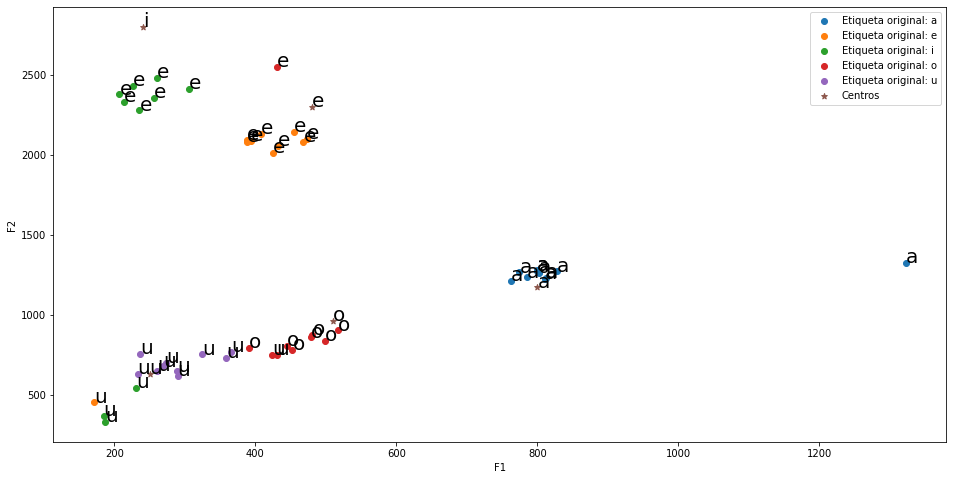

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(martin_a[:,0],martin_a[:,1], label = 'Etiqueta original: a')
for i, txt in enumerate(estimacion_martin_a):
    plt.annotate(txt, (martin_a[i,0], martin_a[i,1]), fontsize = 20)
plt.scatter(martin_e[:,0],martin_e[:,1], label = 'Etiqueta original: e')
for i, txt in enumerate(estimacion_martin_e):
    plt.annotate(txt, (martin_e[i,0], martin_e[i,1]), fontsize = 20)
plt.scatter(martin_i[:,0],martin_i[:,1], label = 'Etiqueta original: i')
for i, txt in enumerate(estimacion_martin_i):
    plt.annotate(txt, (martin_i[i,0], martin_i[i,1]), fontsize = 20)
plt.scatter(martin_o[:,0],martin_o[:,1], label = 'Etiqueta original: o')
for i, txt in enumerate(estimacion_martin_o):
    plt.annotate(txt, (martin_o[i,0], martin_o[i,1]), fontsize = 20)
plt.scatter(martin_u[:,0],martin_u[:,1], label = 'Etiqueta original: u')
for i, txt in enumerate(estimacion_martin_u):
    plt.annotate(txt, (martin_u[i,0], martin_u[i,1]), fontsize = 20)
plt.scatter(centros[:,0], centros[:,1], marker ='*', label = 'Centros')
for i, txt in enumerate(etiquetas_posibles):
    plt.annotate(txt, (centros[i,0], centros[i,1]), fontsize = 20)
plt.legend()
plt.xlabel("F1 Hz")
plt.ylabel("F2 Hz")

Text(0, 0.5, 'F2 Hz')

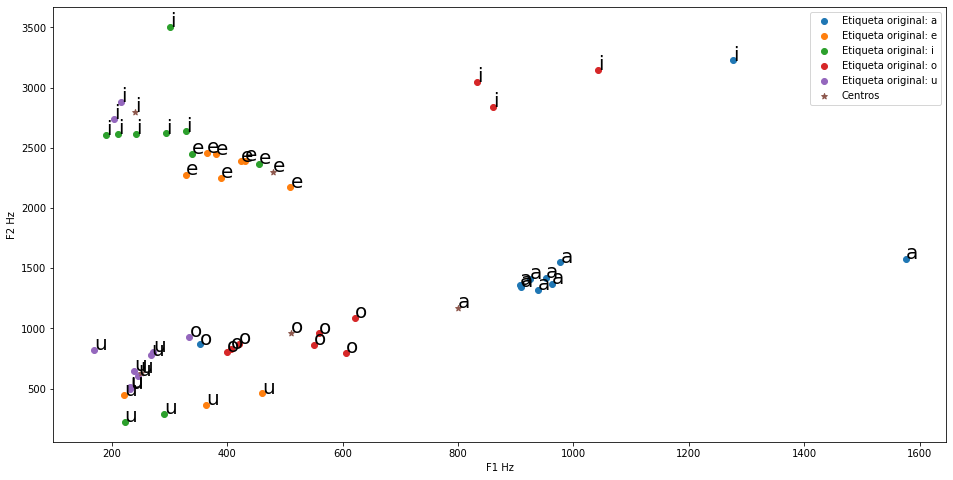

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(cecilia_a[:,0],cecilia_a[:,1], label = 'Etiqueta original: a')
for i, txt in enumerate(estimacion_cecilia_a):
    plt.annotate(txt, (cecilia_a[i,0], cecilia_a[i,1]), fontsize = 20)
plt.scatter(cecilia_e[:,0],cecilia_e[:,1], label = 'Etiqueta original: e')
for i, txt in enumerate(estimacion_cecilia_e):
    plt.annotate(txt, (cecilia_e[i,0], cecilia_e[i,1]), fontsize = 20)
plt.scatter(cecilia_i[:,0],cecilia_i[:,1], label = 'Etiqueta original: i')
for i, txt in enumerate(estimacion_cecilia_i):
    plt.annotate(txt, (cecilia_i[i,0], cecilia_i[i,1]), fontsize = 20)
plt.scatter(cecilia_o[:,0],cecilia_o[:,1], label = 'Etiqueta original: o')
for i, txt in enumerate(estimacion_cecilia_o):
    plt.annotate(txt, (cecilia_o[i,0], cecilia_o[i,1]), fontsize = 20)
plt.scatter(cecilia_u[:,0],cecilia_u[:,1], label = 'Etiqueta original: u')
for i, txt in enumerate(estimacion_cecilia_u):
    plt.annotate(txt, (cecilia_u[i,0], cecilia_u[i,1]), fontsize = 20)
plt.scatter(centros[:,0], centros[:,1], marker ='*', label = 'Centros')
for i, txt in enumerate(etiquetas_posibles):
    plt.annotate(txt, (centros[i,0], centros[i,1]), fontsize = 20)
plt.legend()
plt.xlabel("F1 Hz")
plt.ylabel("F2 Hz")